## Continuous CRQA

Continuous CRQA (contCRQA) is used to uncover the dynamics of two different behavioural time series, such as physiological signals (e.g., heart rate or EEG data) or motion tracking data from interacting individuals. It is performed in much the same manner as [Continuous RQA](rqaContinuous.ipynb). In a cross recurrence plot (CRP), the two time series are plotted against each other on orthogonal axes, 𝑥𝑖 = 1,2,...,𝑛 and 𝑦𝑗 = 1,2,...,𝑛. Recurrent states between the two time series are then indicated by blue points. The resulting plot reflects the way the two systems follow each other's behavioural states in time. CRQA quantifies these properties through various metrics, including:

- Recurrence Rate (%REC): The percentage of recurrent points in the plot, which indicates how often states between the two time series reoccur with one another.
- Determinism (%DET): The percentage of recurrent points that form diagonal lines of at least a given length (e.g., 2 points), indicating how often the same sequence of states reoccurs in both systems.
- Maxline: The length of the longest diagonal sequence of recurrent points. Higher values indicate prolonged periods of recurrent behaviour.
- Meanline: The average length of diagonal lines in the plot, giving insight into the typical duration of repeated patterns between the time series.
- Entropy (ENT): The Shannon entropy of the distribution of diagonal line lengths, which measures the complexity of coordination between the two systems.
- Laminarity (LAM): The percentage of recurrent points forming vertical lines, which reflects instances of stationarity between the time series.

#### Parameters for Running Continuous CRQA

Much like [Continuous RQA](rqaContinuous.ipynb), running CRQA on continuous data, requires us to select three parameters:

- Time delay: This represents the interval between samples required to unfold the temporal structure of a system's trajectory. The appropriate delay helps to reconstruct the system’s dynamics in the phase space. For continuous CRQA, time delay is typically calculated using an average mutual information (AMI) analysis. To learn more about this, see [ami.ipynb](ami.ipynb) in the current tutorial.
- Embedding dimension: This is the number of dimensions needed to recover the system's phase space. For continuous CRQA, embedding dimension is typically calculated using a false nearest neighbors (FNN) analysis. To learn more about this, see [fnn.ipynb](fnn.ipynb) in the current tutorial.
- Radius: This defines how close two states must be to be considered recurrent. Unlike categorical RQA, the radius for continuous data is a threshold based on a distance metric (e.g., Euclidean distance), ensuring that nearby—but not necessarily identical—states are considered recurrent.


#### Let's Practice Running CRQA on Continuous Data

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run CRQA, and create visualisations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [2]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_crqa, perform_rqa
from utils.plot_utils import plot_ts_and_crqa, plot_rqa_multi_radii

C:\Users\MQ20188409\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytools\persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply CRQA to some real data—in this case, acceleration data from two people walking together - [walker A](data/rqaContinuous/walkerAfriend.txt) and [walker B](data/rqaContinuous/walkerBfriend.txt).

Just click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkersABfriend.txt


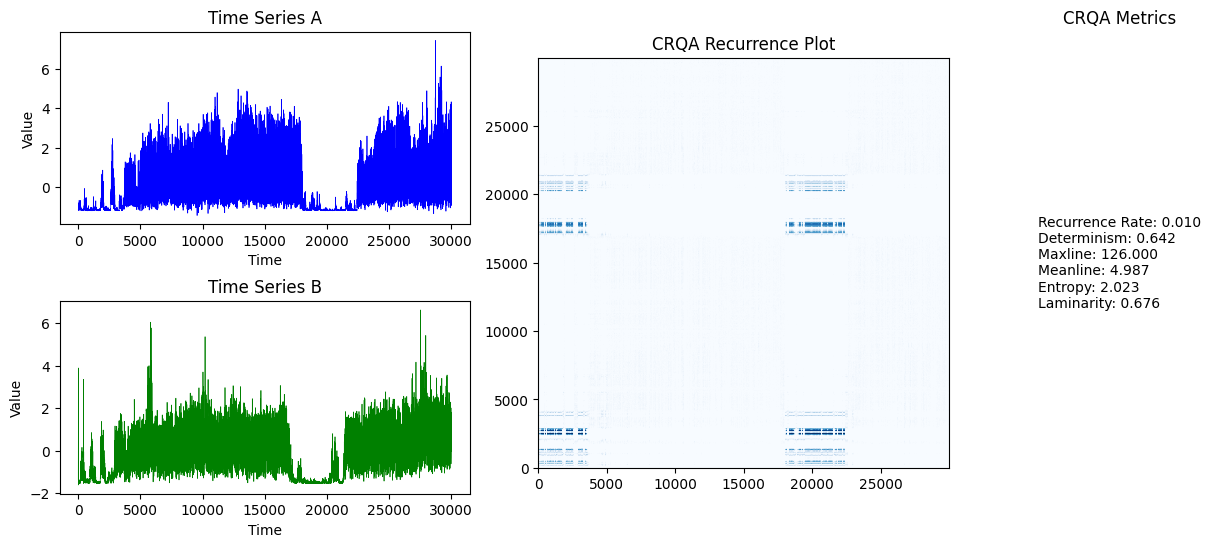

CRQA analysis and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkersABfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
crqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.3,
    'minLine': 2,
    'getRP': True
}

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Perform CRQA using perform_rqa function from rqa_utils
    crqa_results, rp_results = perform_crqa(data, **crqa_params)

    # Create RQA metrics dictionary
    for column, result in crqa_results.items():
        crqa_metrics = {
            'Recurrence Rate': result.recurrence_rate,
            'Determinism': result.determinism,
            'Maxline': result.longest_diagonal_line,
            'Meanline': result.average_diagonal_line,
            'Entropy': result.entropy_diagonal_lines,
            'Laminarity': result.laminarity,
        }

    # Plot time series and recurrence plot side-by-side
    plot_ts_and_crqa(data.iloc[:, 0].values, data.iloc[:, 1].values, rp_results['0_1'].recurrence_matrix, crqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')

    print('CRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the data:

- %REC: 1% - This value tells us how often the two walker's acceleration data return to similar states at the same time. Higher recurrence values indicate more coordination between the walkers.
- %DET: 64.2% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of the walkers' coordinated movement patterns.
- Maxline: 126 - This metric identifies the longest sequence of recurring acceleration patterns between the two walkers. A higher value here suggests that walker's exhibited more stable patterns of coordinated activity.
- Meanline: 4.9 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the walkers' movements remained similar.

#### Changing the Radius

In the previous code, we used the following parameters:
- Time delay: 15
- Embedding dimension: 3
- Radius = 0.3

The time delay and the embedding dimension were selected using an average mutual information (AMI) analysis, and a false nearest neighbors (FNN) analysis. See the relevant analysis scripts, [ami.ipynb](ami.ipynb) and [fnn.ipynb](fnn.ipynb), for more information on selecting these.

Recall that the radius determines how close two states must be in phase space to be considered recurrent. Adjusting the radius therefore allows us to control the sensitivity of detecting recurrences. 

Let’s run CRQA on the walking data again, this time using a range of radii: 0.1, 0.3, and 0.5. Observe how changing the radius influences the recurrence plot and the resulting metrics, such as %REC and %DET.

Click "play" to execute the code below and examine how the results differ for each radius.

Loading file: walkersABfriend.txt
Calculating CRQA with radius: 0.1
Calculating CRQA with radius: 0.3
Calculating CRQA with radius: 0.5


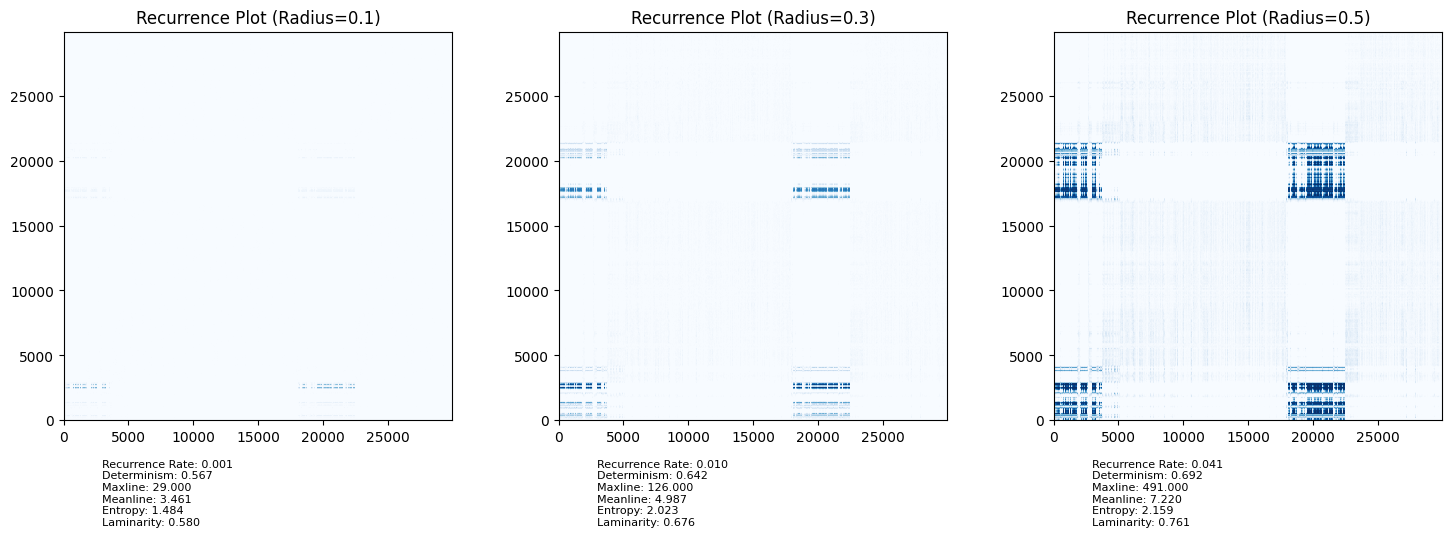

CRQA analysis and plotting completed successfully!


In [6]:
# First set the directory path for the data
data_directory = "data/crqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkersABfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters (excluding radius, which will be added in the loop)
crqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'minLine': 2,
    'getRP': True
}

# Radii to iterate over
radii = [0.1, 0.3, 0.5]

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None, sep='\t')

    # Interpolate any missing data that might be present in the file
    data = interpolate_missing_data(data)

    # Apply a filter to the data
    data = filter_data(data)
    
    # Normalise the data by using a z-score
    data = (data - data.mean()) / data.std()

    # Lists to store results for different radii
    rp_results_list = []
    crqa_metrics_list = []

    # Loop over each radius and calculate CRQA
    for radius in radii:
        print(f'Calculating CRQA with radius: {radius}')
        crqa_params['radius'] = radius

        # Perform CRQA using perform_crqa function from rqa_utils
        crqa_results, rp_results = perform_crqa(data, **crqa_params)

        # Create RQA metrics dictionary for each radius
        for column, result in crqa_results.items():
            crqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }
            crqa_metrics_list.append(crqa_metrics)
            rp_results_list.append(rp_results['0_1'].recurrence_matrix)

    # Plot recurrence plots and metrics for different radii
    plot_filename = f'images/rqa/{file_name}_multi_radii_plot.png'
    plot_rqa_multi_radii(rp_results_list, crqa_metrics_list, radii, save_image, plot_filename)

    print('CRQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Selecting the Optimal Radius

When selecting a radius, best practice involves using a range of values and choosing the one that yields a reasonable set of %REC values for biological systems (typically between 0.5% and 5%). In this case, the best radii for our walking data appear to be 0.3 or 0.5, which yield %REC values of 1% and 4.1%, respectively. 

In real datasets, it is important to evaluate whether the distribution of CRQA metrics changes significantly across different settings. Although the absolute values of the CRQA metrics may vary (e.g., %REC will increase as the radius increases), the overall distribution across the dataset should remain generally consistent. This consistency can give you confidence that your parameters are appropriate.

#### Going Further

To expand your understanding of continuous CRQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as [dyadic pendulum swinging](data/rqaContinuous/pendulums.txt).
2. Experiment with other parameters: Previously, we experimented with different radii values. Now, try adjusting the time delay or embedding dimension to see how these parameters impact the recurrence plots and CRQA metrics.
3. Learn how to select an appropriate delay and embedding dimension: Head over to [ami.ipynb](ami.ipynb) or [fnn.ipynb](fnn.ipynb) within this tutorial to learn more about setting the hyperparameters required for continuous CRQA.
4. Run a windowed CRQA: To assess how recurrence patterns change over time, explore [rqaWindowed.ipynb](rqaWindowed.ipynb) which walks you through performing windowed CRQA.